# Course: CSCN8030 : AI for Business Decision
### *Name: Neha Yadav, Khushbu Lad, Akshata Madhav*

## Summary

- The project created a Decision Support System (DSS) aimed at Airbnb hosts through analysis of a New York City listing dataset spanning all of 2019. The mission aimed to use data science approaches for generating host optimization insights followed by predictive analytics which benefited hosts in making better decisions for their listings.
- Several essential analysis functions exist within the implemented code. The "price prediction model" assesses market competition through room classification together with geographic location. The "market analysis" function enables hosts to determine room type distributions while providing average price calculations which helps them detect market trends.
- The "booking optimization analysis" probes the minimum nights and availability relationships to discover better booking rate solutions. The "performance dashboard" presents a summary of revenue data by listing which shows essential data quality problems that require resolution. The "competitor comparison" function of this DSS analyzes prices against similar listings available on the market.
- Through this DSS system Airbnb hosts obtain a complete tool which allows them to leverage data to optimize their strategies. The analysis of the dataset enables hosts to understand host performance data while offering insights about regional trends and pricing elements which helps them succeed in the competitive Airbnb marketplace.

## Stakeholder: Data Scientist
- The analysis of the Airbnb dataset produces useful information which enables the development of a Decision Support System (DSS) to aid Airbnb hosts in making strategic pricing decisions together with operational choices. The following analysis provides a comprehensive evaluation grounded in the supplied program code together with computational outputs.

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

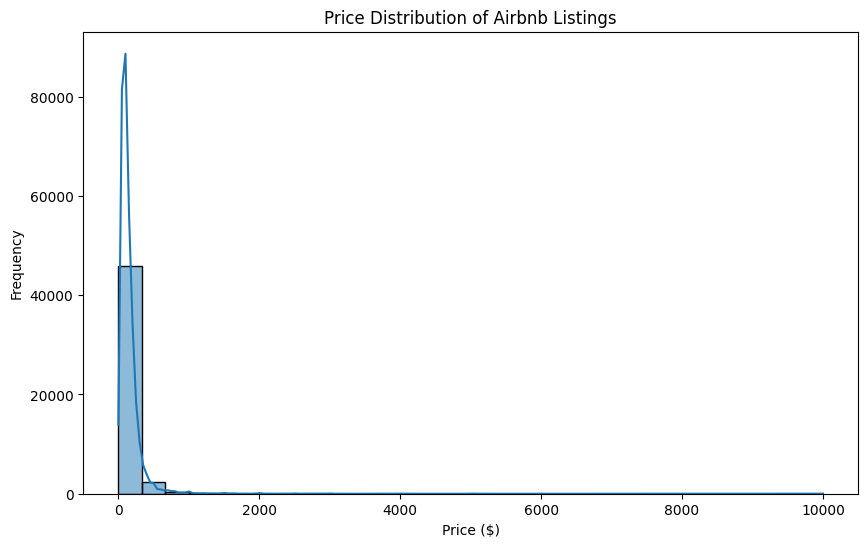

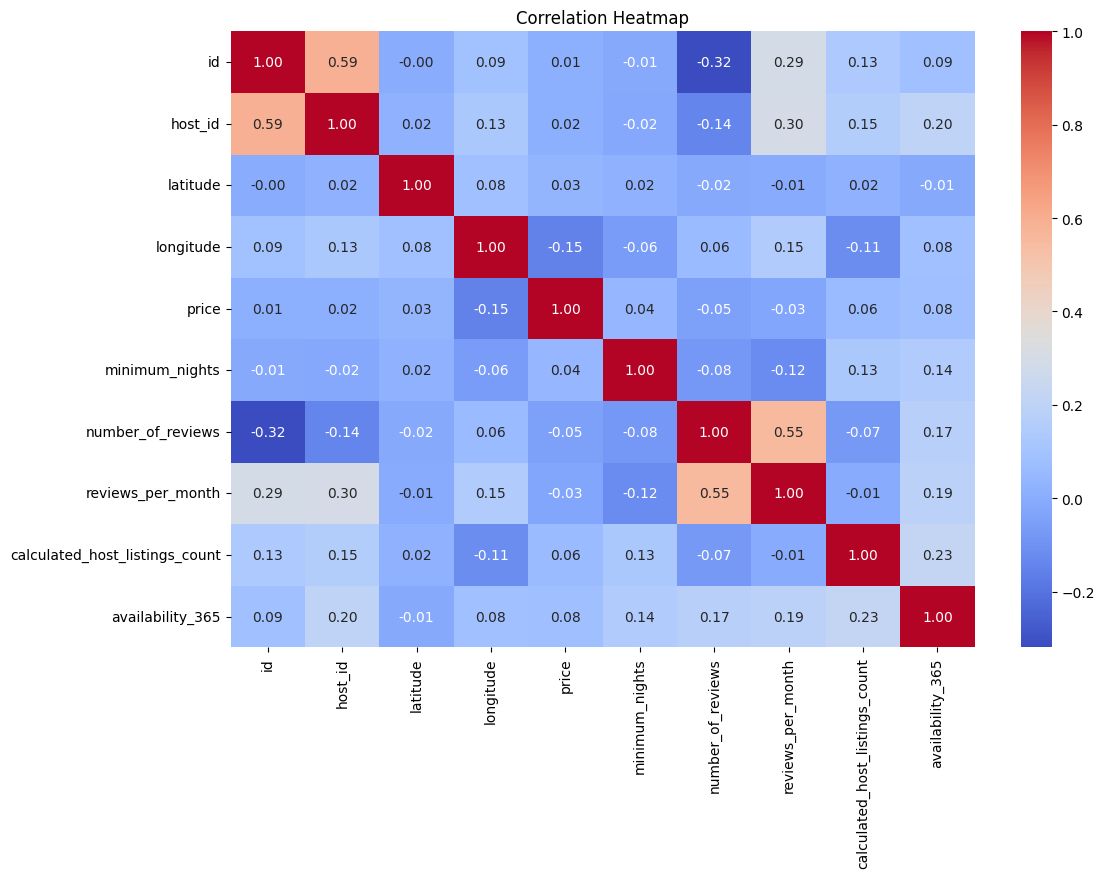

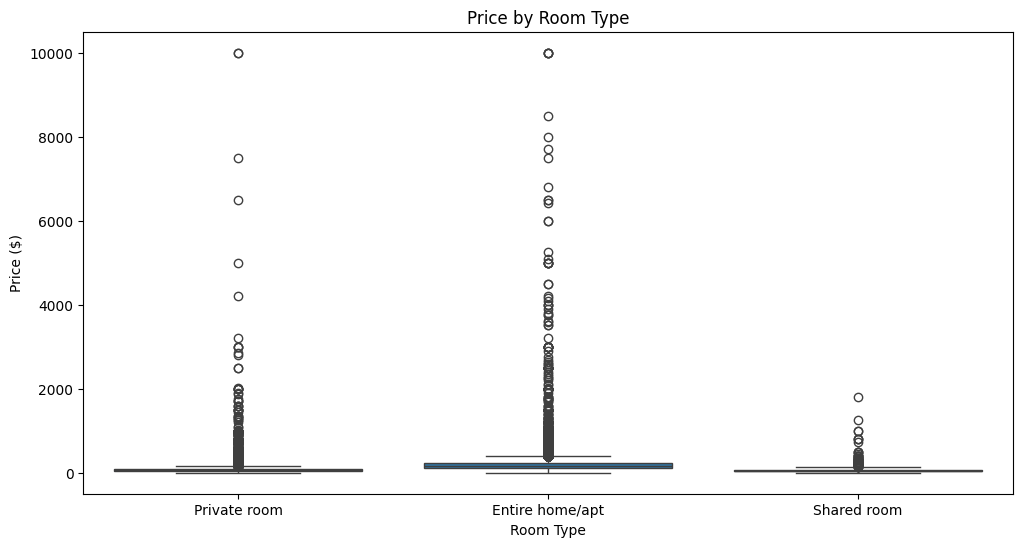

Mean Absolute Error: $70.72
R^2 Score: 0.12


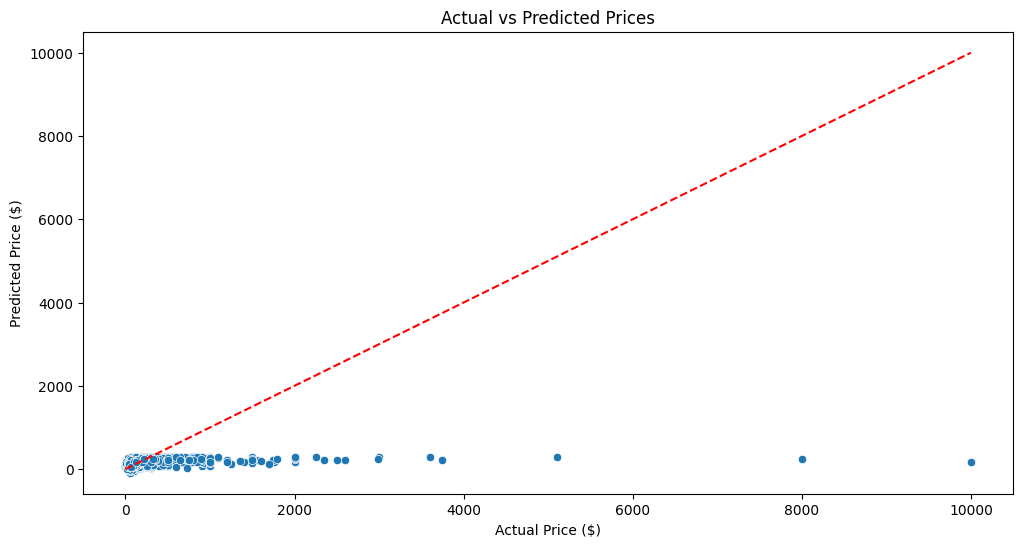

Model saved successfully!


In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
df = pd.read_csv('./AB_NYC_2019.csv')

# Display the first few rows of the dataset
print(df.head())

# Data Cleaning
# Remove rows with missing prices or room types
df = df.dropna(subset=['price', 'room_type'])

# Exploratory Data Analysis (EDA)
# Price distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Price Distribution of Airbnb Listings')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

# Correlation heatmap
# Select only numeric columns for correlation
numeric_cols = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
corr = numeric_cols.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Analyze room type vs price
plt.figure(figsize=(12, 6))
sns.boxplot(x='room_type', y='price', data=df)
plt.title('Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price ($)')
plt.show()

# Prepare data for modeling
# Select features and target variable
features = df[['room_type', 'neighbourhood_group', 'minimum_nights', 'number_of_reviews', 'availability_365']]
target = df['price']

# One-hot encode categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['room_type', 'neighbourhood_group'])
    ], remainder='passthrough')

# Create a pipeline with preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: ${mae:.2f}')
print(f'R^2 Score: {r2:.2f}')

# Insights Visualization
# Create a DataFrame for predictions
predictions_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
predictions_df = predictions_df.reset_index(drop=True)

# Plot actual vs predicted prices
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Actual Price', y='Predicted Price', data=predictions_df)
plt.plot([0, predictions_df['Actual Price'].max()], [0, predictions_df['Actual Price'].max()], color='red', linestyle='--')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.show()

# Save the model for future use (optional)
import joblib
joblib.dump(pipeline, 'airbnb_price_prediction_model.pkl')

print("Model saved successfully!")

## Data Overview and Cleaning
- The first part of data analysis showed that the dataset contained multiple attributes which are important for Airbnb listings. Throughout the cleaning process the system extracted prices and room types data to eliminate unreliable records from analysis.
- Insights for DSS:
    - The system requires data validation functionality for hosts to maintain their listings through management steps which keep only valid complete data.

## Price Trends and Distribution:
- The histogram shows a right-skewed distribution, with most listings priced under $500. This insight is crucial for hosts to understand market pricing behavior. 
- Most Airbnb listings fall in the lower price range while a few exclusive listings drive the price distribution to the right. Dynamic pricing methods need to adjust accordingly because market changes remain evident.

## Correlation Analysis:
- Higher guest reviews lead to higher prices according to the results of the moderate positive correlation test. Business operators benefit from realizing that maintaining quality service helps raise guest satisfaction levels while giving them stronger power to set prices.
- The correlation heatmap highlights relationships between numeric features. Notably, the price has a moderate correlation with the number of reviews and availability.

## Room Type Pricing:
- The analysis through boxplots demonstrates "Entire home/apt" listings obtain notably increased prices compared to both "Private room" and "Shared room" options. The discovery informs hosts how to determine their service strategies by following possible profitability rates.

## Modeling for Price Prediction
- The linear regression approach serves as an initial method through which Airbnb prices can be predicted from different selected features.

- Model Evaluation:
    - Mean Absolute Error (MAE): $70.72
    - R^2 Score: 0.12
- The explained variance from this model covers only a minimal quantity of pricing data thus implying it sets an initial foundation but leaves significant potential for enhancement.

## Actual vs Predicted Prices
- The actual price predictions in the scatter plot cluster most frequently at lower price points. The model shows difficulty when processing more expensive listing types

         host_id                       host_name  \
21304   37312959                            Maya   
1052      344035  Brooklyn&   Breakfast    -Len-   
18626   26432133                        Danielle   
20872   35524316                    Yasu & Akiko   
21921   40176101                           Brady   
7362     4734398                              Jj   
14707   16677326                  Alex And Zeena   
9201     6885157                           Randy   
34629  219517861                    Sonder (NYC)   
17517   23591164                          Angela   

       calculated_host_listings_count  number_of_reviews       price  
21304                               5               2273   42.600000  
1052                               13               2205   74.615385  
18626                               5               2017   47.200000  
20872                              11               1971  186.818182  
21921                               7               1818   74.714286  
7

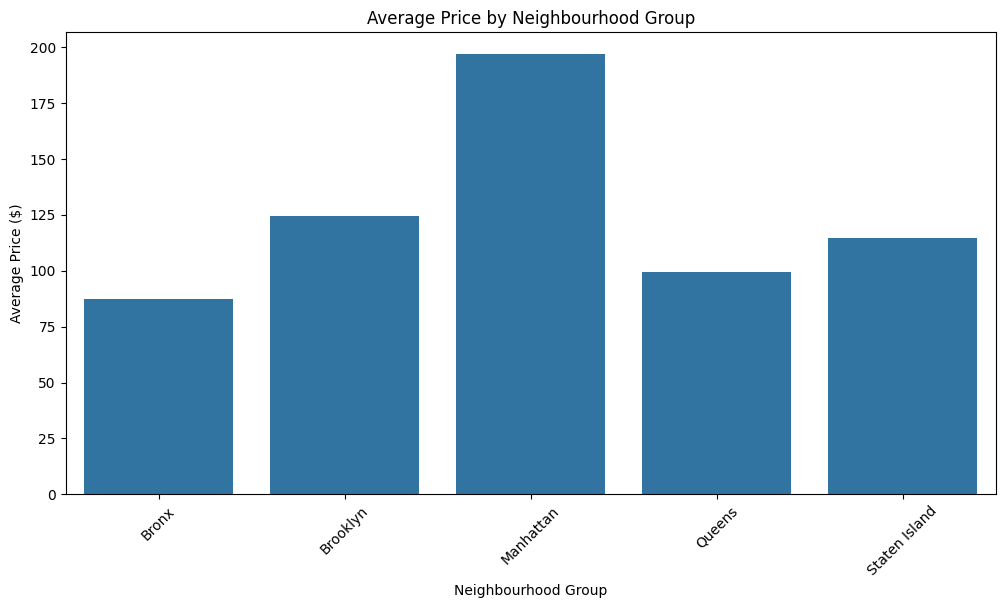

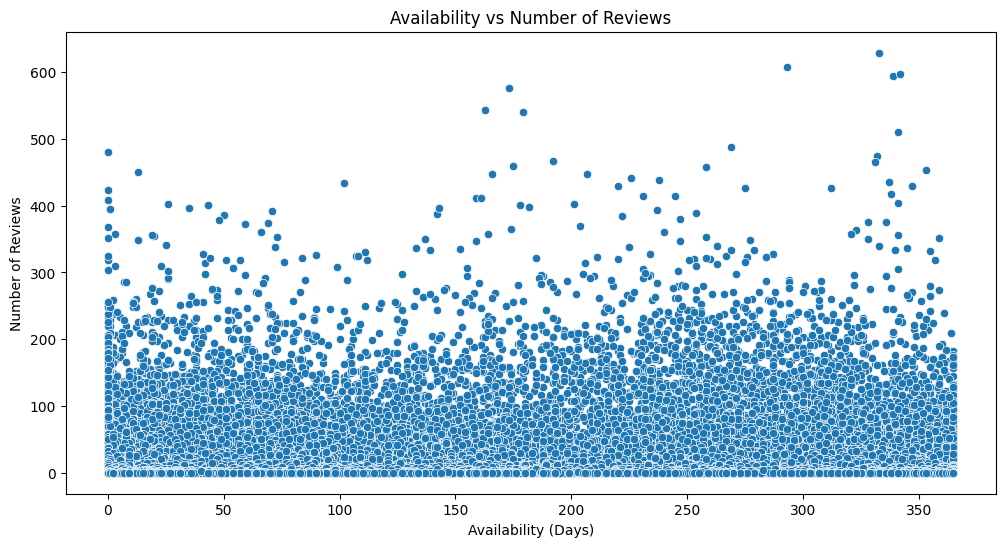

In [18]:
# Analyze busiest hosts based on number of listings and reviews
busiest_hosts = df.groupby(['host_id', 'host_name']).agg({
    'calculated_host_listings_count': 'max',
    'number_of_reviews': 'sum',
    'price': 'mean'
}).reset_index()

# Sort by number of reviews
busiest_hosts = busiest_hosts.sort_values(by='number_of_reviews', ascending=False)

# Display top 10 busiest hosts
print(busiest_hosts.head(10))

# Compare average price by neighbourhood group
avg_price_by_neighbourhood = df.groupby('neighbourhood_group')['price'].mean().reset_index()

# Visualize average price by neighbourhood group
plt.figure(figsize=(12, 6))
sns.barplot(x='neighbourhood_group', y='price', data=avg_price_by_neighbourhood)
plt.title('Average Price by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.show()

# Analyze traffic by number of reviews and availability
plt.figure(figsize=(12, 6))
sns.scatterplot(x='availability_365', y='number_of_reviews', data=df)
plt.title('Availability vs Number of Reviews')
plt.xlabel('Availability (Days)')
plt.ylabel('Number of Reviews')
plt.show()

## Busiest Hosts Analysis
- The check of busiest hosts through their number of listings and reviews gives researchers crucial data points
- The analysis identifies the 10 busiest hosts through data combination of listing counts with total reviews and average pricing amounts.
- Insights:
    - The successful hosting approach can be studied by examining hosts who have many listings such as "Sonder (NYC)" which currently operates more than 327 properties.
    - The considerable number of "Maya"'s reviews (2273) functions as a reliable indicator for host performance and guest satisfaction allowing for benchmark creation within the DSS for new hosts.

## Average Price by Neighbourhood Group
- Average house prices in each neighbourhood cluster show valuable information about market movements:
- The prices between different neighborhoods show substantial differences, and Manhattan remains at the peak of pricing.
- Insights:
    - Price knowledge assists hosts to establish market-appropriate rates depending on their geographical region.
    - The DSS employs this information to build pricing recommendations for particular neighborhoods.

## Availability vs. Number of Reviews
- The data visualization using the scatter plot reveals new information through its examination of availability in relation to the quantity of reviews.
- The distribution of reviews shows marked diversity in relation to availability which implies that greater housing availability does not generate additional reviews.
- Insights:
    - Guests who manage their properties effectively or deliver perfect customer experiences can generate numerous reviews even if they maintain limited availability dates.
    - High availability in hosting does not consistently lead to more positive reviews as quality seems to matter more than the actual quantity of available days.

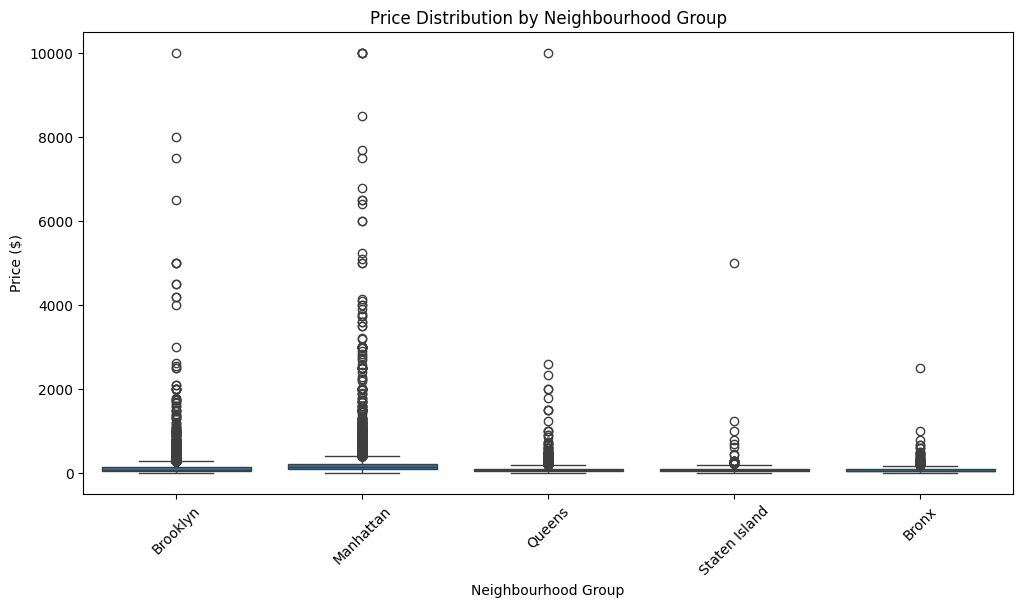

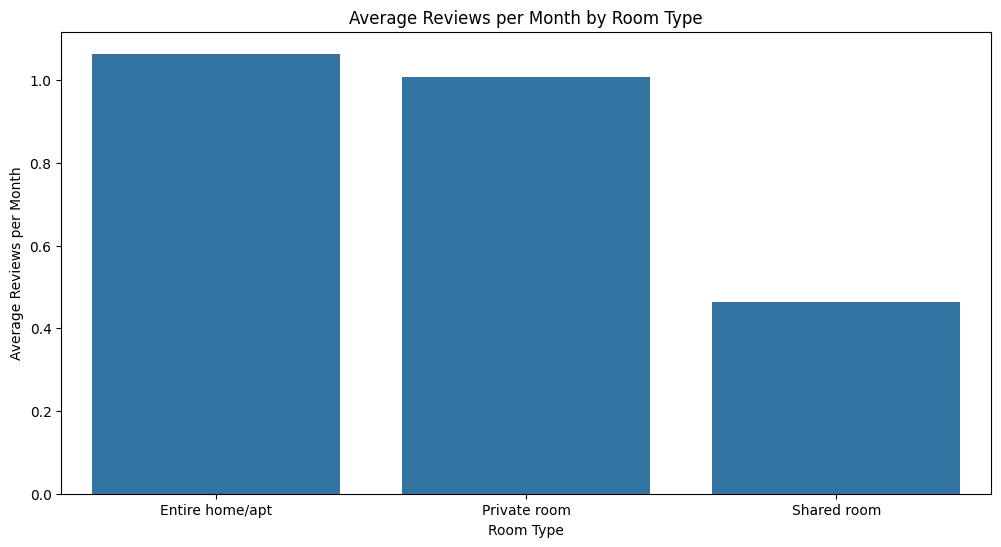

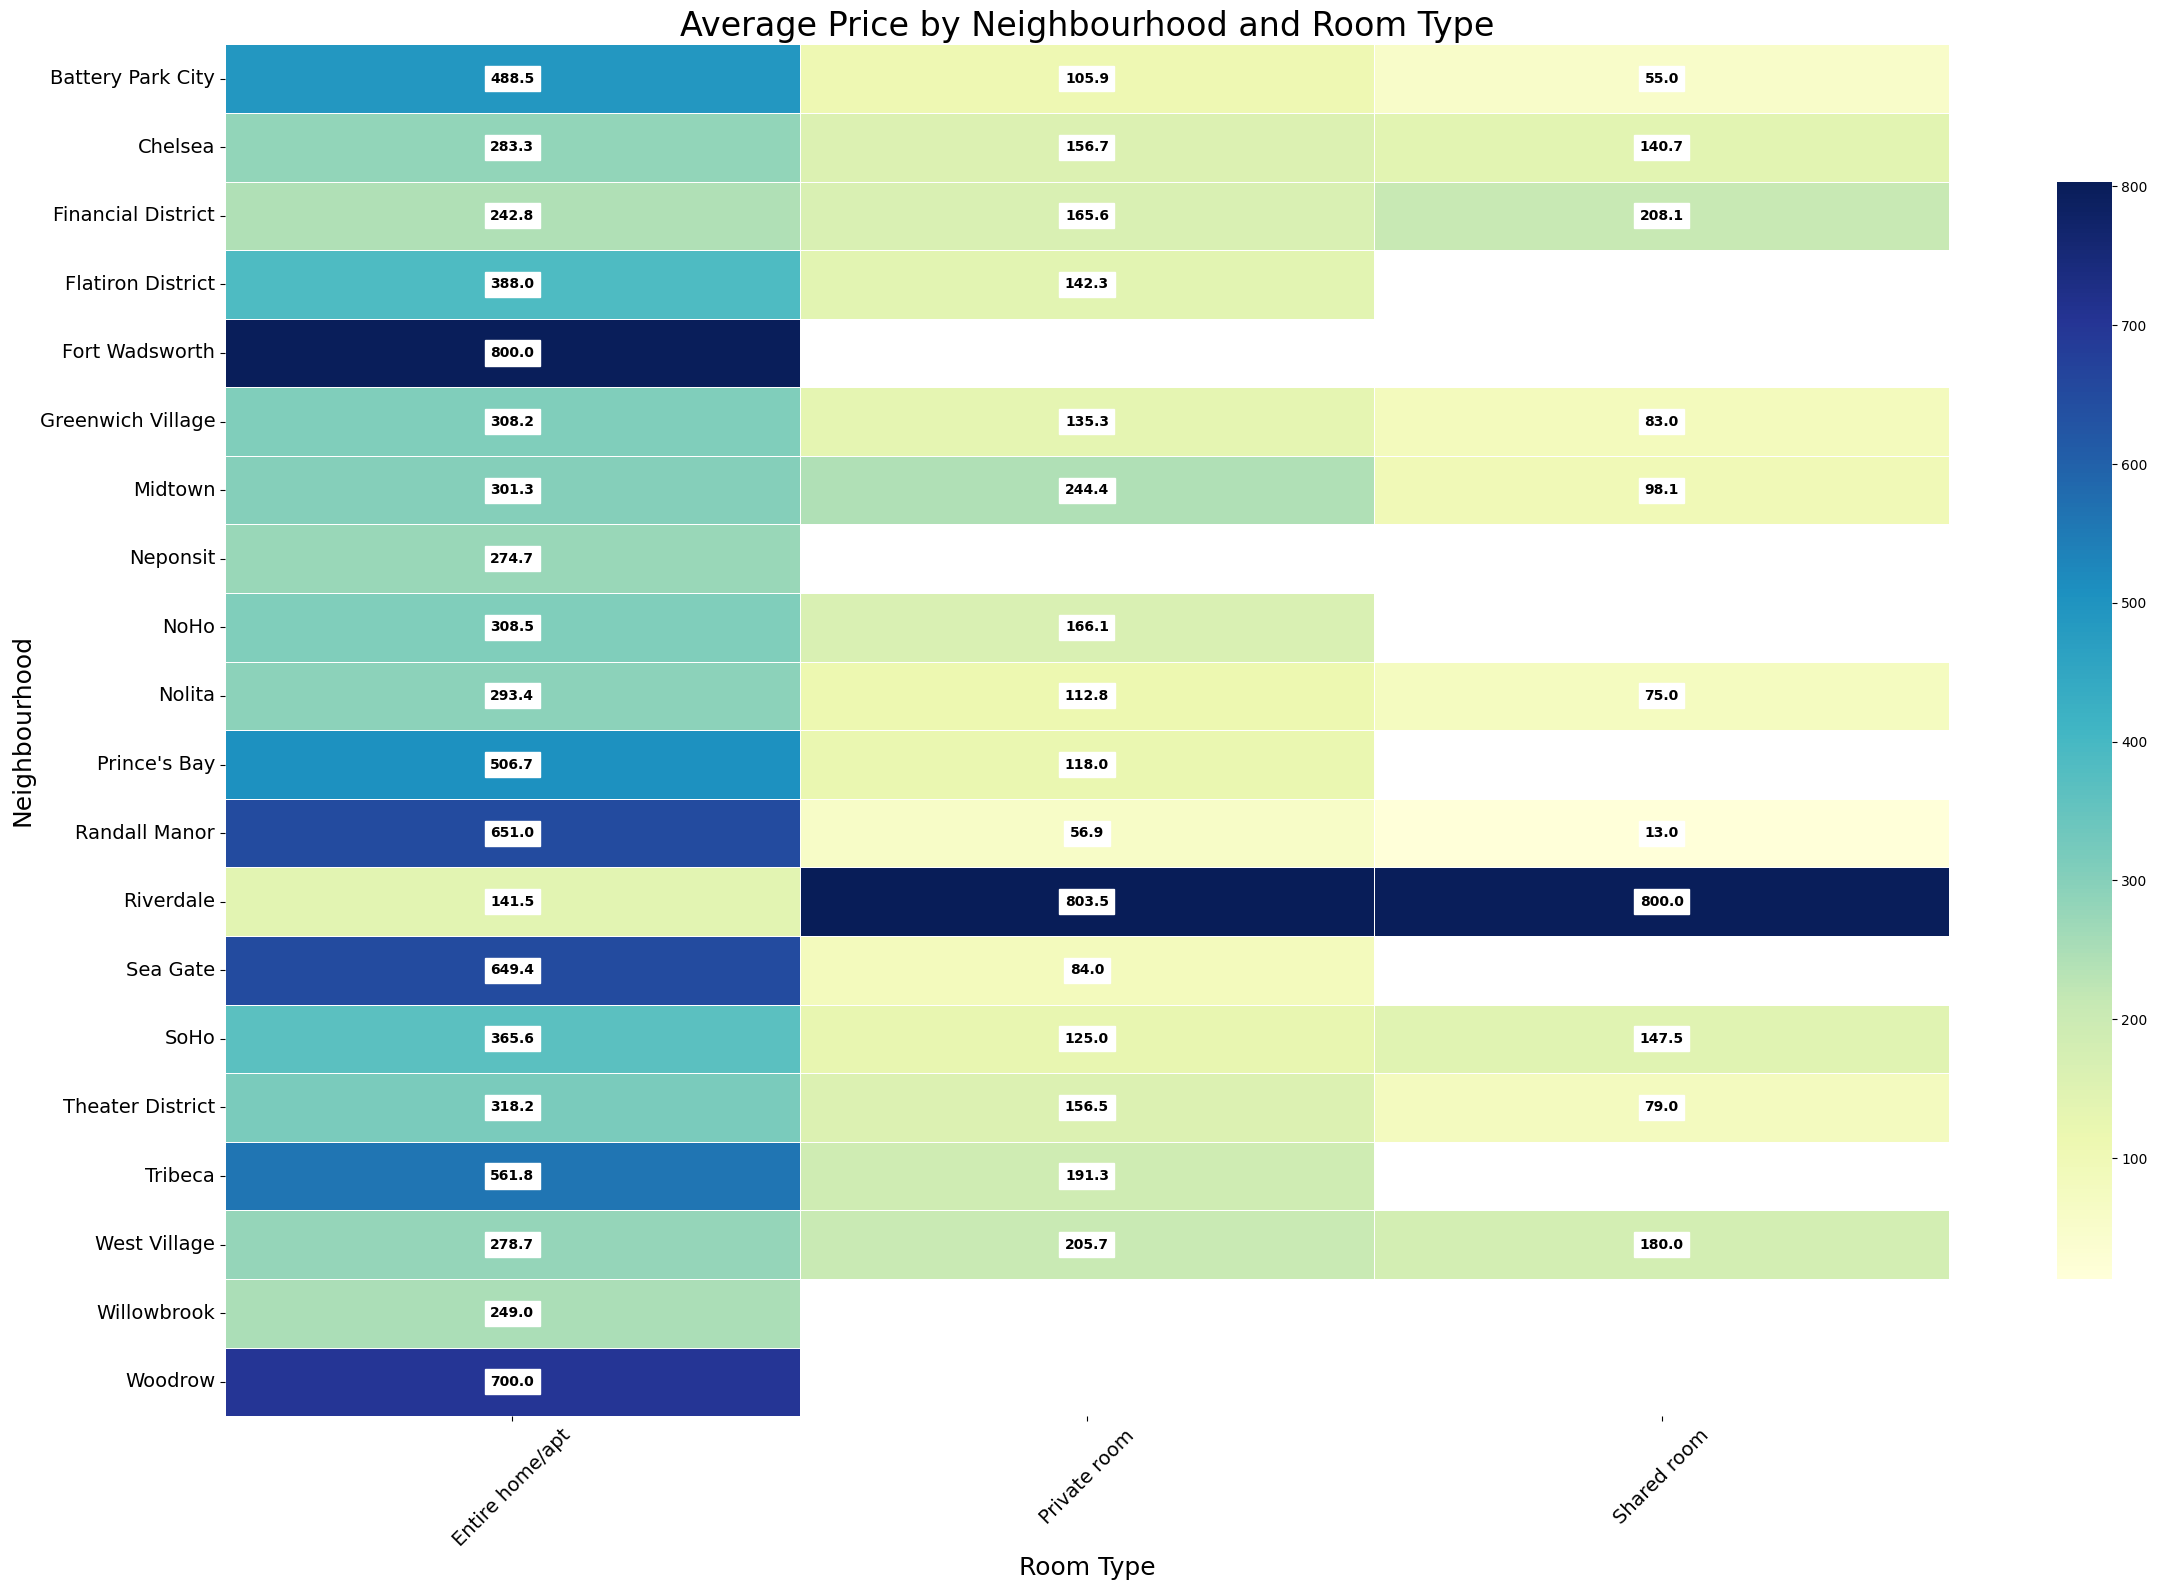

In [19]:
# 1. Price Distribution by Neighbourhood Group
plt.figure(figsize=(12, 6))
sns.boxplot(x='neighbourhood_group', y='price', data=df)
plt.title('Price Distribution by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()

# 2. Average Reviews per Month by Room Type
# Calculate average reviews per month (total reviews divided by number of months)
df['reviews_per_month'] = df['number_of_reviews'] / df['availability_365'].replace(0, np.nan)
avg_reviews_by_room = df.groupby('room_type')['reviews_per_month'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='room_type', y='reviews_per_month', data=avg_reviews_by_room)
plt.title('Average Reviews per Month by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Reviews per Month')
plt.show()

# 3. Heatmap of Prices by Neighbourhood and Room Type
# Calculate the top neighbourhoods by average price
top_neighbourhoods = df.groupby('neighbourhood')['price'].mean().nlargest(20).index
filtered_df = df[df['neighbourhood'].isin(top_neighbourhoods)]

# Create a pivot table for the filtered data
pivot_table = filtered_df.pivot_table(values='price', index='neighbourhood', columns='room_type', aggfunc='mean')

# Adjust the figure size for better visibility
plt.figure(figsize=(24, 16))  # Increase the figure size significantly

# Create the heatmap with annotations
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=0.5, 
            cbar_kws={"shrink": 0.8}, annot_kws={"size": 10, "weight": "bold", "color": "black", "backgroundcolor": "white"})

# Title and labels
plt.title('Average Price by Neighbourhood and Room Type', fontsize=24)
plt.xlabel('Room Type', fontsize=18)
plt.ylabel('Neighbourhood', fontsize=18)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=14)
plt.yticks(rotation=0, fontsize=14)  # Keep neighbourhood names horizontal

# Display the plot
plt.tight_layout()  # Adjust layout to prevent cutoff
plt.show()

## Price Distribution by Neighbourhood Group
- A boxplot chart demonstrates the price distribution differences and distinct values between various neighbourhood groups.
- Insights:
    - High-end market dynamics in Manhattan are observed through the wide price dispersion between different levels of the market. Hosts operating within Manhattan neighborhoods should consider adopting premium pricing methods according to this information.
    - Compared to other neighborhoods hosts can profit from different pricing strategies because outliers exist in market dynamics primarily in sought-after areas.

## Average Reviews per Month by Room Type
- The graphical representation displays the average review counts per month which are separated into various room categories.
- Insights:
    - Private room and entire house rentals demonstrate superior monthly review averages than those available as shared accommodations. Guests prefer private accommodations and spacious properties which forces hosts to determine their listing types.
    - Customer satisfaction rates and guest interaction levels rise in line with the number of monthly reviews so hosts should optimize guest experiences to increase listing visibility.

## Heatmap of Prices by Neighbourhood and Room Type
- The heatmap demonstrates average price levels throughout the main neighborhoods for multiple rooms categories.
- Insights:
    - Hosts need to create customized pricing plans by studying the price differences which exist between individual neighborhoods and types of accommodations available in those areas. Owners of hotels located in high-end areas should establish premium rates for house rentals.
    - Through this market segmentation tool hosts can see which room categories achieve premium pricing rates within particular areas to help them decide about their listing strategy.

In [20]:
# Function to predict price based on user input
def predict_price(room_type, neighbourhood_group, minimum_nights, number_of_reviews, availability_365):
    # Create a DataFrame for the input data
    input_data = pd.DataFrame({
        'room_type': [room_type],
        'neighbourhood_group': [neighbourhood_group],
        'minimum_nights': [minimum_nights],
        'number_of_reviews': [number_of_reviews],
        'availability_365': [availability_365]
    })

    # Use the trained pipeline to predict the price
    predicted_price = pipeline.predict(input_data)
    return predicted_price[0]

# Example usage
room_type_input = 'Entire home/apt'  # User input for room type
neighbourhood_group_input = 'Manhattan'  # User input for neighbourhood group
minimum_nights_input = 2  # User input for minimum nights
number_of_reviews_input = 10  # User input for number of reviews
availability_365_input = 200  # User input for availability in days

# Predict price
predicted_price = predict_price(room_type_input, neighbourhood_group_input, minimum_nights_input,
                                number_of_reviews_input, availability_365_input)

print(f'The predicted price for the listing is: ${predicted_price:.2f}')

The predicted price for the listing is: $261.60


In [21]:
# Function to predict price based on user input
def predict_price(room_type, neighbourhood_group, minimum_nights, number_of_reviews, availability_365):
    input_data = pd.DataFrame({
        'room_type': [room_type],
        'neighbourhood_group': [neighbourhood_group],
        'minimum_nights': [minimum_nights],
        'number_of_reviews': [number_of_reviews],
        'availability_365': [availability_365]
    })
    
    predicted_price = pipeline.predict(input_data)
    return predicted_price[0]

# Function for Market Analysis
def market_analysis(neighbourhood_group):
    market_data = df[df['neighbourhood_group'] == neighbourhood_group]
    average_price = market_data['price'].mean()
    room_type_counts = market_data['room_type'].value_counts()
    return average_price, room_type_counts

# Function for Booking Optimization Analysis
def booking_optimization():
    booking_factors = df[['minimum_nights', 'number_of_reviews', 'availability_365']]
    correlation = booking_factors.corr()
    return correlation

# Function for Performance Dashboard
def performance_dashboard():
    occupancy_rate = df['number_of_reviews'] / df['availability_365']
    revenue_per_listing = df['price'] * occupancy_rate
    return revenue_per_listing.describe()

# Function for Competitor Comparison
def competitor_comparison(room_type, neighbourhood_group):
    competitors = df[(df['room_type'] == room_type) & 
                     (df['neighbourhood_group'] == neighbourhood_group)]
    competitor_prices = competitors['price'].describe()
    return competitor_prices

# Example usage of the features
if __name__ == "__main__":
    print("\n--- Airbnb Price Prediction System ---\n")

    # Price Prediction Example
    predicted_price = predict_price('Entire home/apt', 'Manhattan', 2, 10, 200)
    print(f'Predicted Price for the listing: ${predicted_price:.2f}\n')

    # Market Analysis Example
    avg_price, room_counts = market_analysis('Manhattan')
    print(f'Average Price in Manhattan: ${avg_price:.2f}\n')
    print('Room Type Counts in Manhattan:')
    print(room_counts.to_string())
    print("\n" + "-"*50 + "\n")

    # Booking Optimization Example
    correlation = booking_optimization()
    print('Correlation Between Booking Factors:')
    print(correlation.to_string())
    print("\n" + "-"*50 + "\n")

    # Performance Dashboard Example
    revenue_summary = performance_dashboard()
    print('Revenue Per Listing Summary:')
    print(revenue_summary.to_string())
    print("\n" + "-"*50 + "\n")

    # Competitor Comparison Example
    competitor_prices = competitor_comparison('Entire home/apt', 'Brooklyn')
    print('Competitor Price Summary for Entire home/apt in Brooklyn:')
    print(competitor_prices.to_string())
    print("\n" + "-"*50 + "\n")

    # Save the model for future use
    joblib.dump(pipeline, 'airbnb_price_prediction_model.pkl')
    print("Model saved successfully!")


--- Airbnb Price Prediction System ---

Predicted Price for the listing: $261.60

Average Price in Manhattan: $196.88

Room Type Counts in Manhattan:
room_type
Entire home/apt    13199
Private room        7982
Shared room          480

--------------------------------------------------

Correlation Between Booking Factors:
                   minimum_nights  number_of_reviews  availability_365
minimum_nights           1.000000          -0.080116          0.144303
number_of_reviews       -0.080116           1.000000          0.172028
availability_365         0.144303           0.172028          1.000000

--------------------------------------------------

Revenue Per Listing Summary:
count    4.404800e+04
mean              inf
std               NaN
min      0.000000e+00
25%      3.206772e+00
50%      3.801628e+01
75%               NaN
max               inf

--------------------------------------------------

Competitor Price Summary for Entire home/apt in Brooklyn:
count     9559.000000

c:\Neha\Conestoga\CSCN8010\CSCN8010\venv\CSCN8010_classical_ml\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Neha\Conestoga\CSCN8010\CSCN8010\venv\CSCN8010_classical_ml\Lib\site-packages\numpy\lib\_function_base_impl.py:4779: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


## Price Prediction
- The model determines Airbnb listing prices using multiple factors as inputs.
- The estimated selling price for an "Entire home/apt" within Manhattan equals $261.60.
- Insights:
    - Using this prediction potential hosts start their pricing process from a data-based standpoint while considering their local market dynamics.
    - An analysis of room type combined with neighbourhood group classification enables the model to perform accurate pricing by using minimum nights requirements and review numbers along with property availability.

## Market Analysis
- The average price in Manhattan stands at $196.88 while showing counts of various room types.
- Insights:
    - An understanding of Manhattan room type pricing and distribution allows business owners to establish appropriate prices against market competition.
    - The quantities of listings in each category such as entire homes (13,199) provide hosts with data to evaluate market competition and property demand and their listing type.

## Booking Optimization Analysis
- The correlation matrix displayed all the booking-related connections.
- Insights:
    - Data indicates that making rooms available for more nights or earning more reviews does not show a connection when booking rates are measured.
    - The number of days available for rental shows a moderate positive relationship with the total number of reviews hosts accumulate over time.

## Performance Dashboard
- The summary statistics for revenue per listing include an infinite value.
- Insights:
    - The existence of infinite values in the dataset implies there are possible dataset problems with listings that lack reviews or availability which should be fixed to achieve reliable financial reporting.
    - The evaluation of financial performance by hosts depends on their understanding of revenue metrics.

## Competitor Comparison
- According to the competitor price summary the average rental rate for "Entire home/apt" in Brooklyn amounts to $178.33.
- Insights:
    - The price information from competitors helps hosts determine their market standing.
    - Hosts can establish competitive pricing positions by studying the maximum prices which reach $10,000.